# Aula 02 - Análise Exploratória de Dados

---


In [ ]:
import numpy as np
import pandas as pd

df_dataset = pd.read_csv('iris.csv', sep=',', index_col=None) 

---

Retomando a aula anterior, esse material aborda como fazer a exploração dos dados e conhecer características que podem distinguir uma classe de outra.

In [ ]:
df_dataset.shape

(150, 5)

In [ ]:
df_dataset.head(n=5)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---

A função describe() de um DataFrame auxilia a entender algumas medidas estatísticas que descrevem os dados. Serve para entender se uma distribuição é muito diferente de outra e se existe ou não a presença de pontos incomuns.

In [ ]:
df_dataset.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
classe = df_dataset["classe"]
classe.describe()

In [ ]:
df_amostrasSetosa = df_dataset[ df_dataset["classe"] == "Iris-setosa"]
df_amostrasSetosa.shape

---

Em um determinado momento, pode ser interessante a análise para verificar se uma classe específica difere muito da descrição do conjunto de dados como um todo.

In [ ]:
display(df_dataset.describe())
display(df_amostrasSetosa.describe())

In [ ]:
# encontra as classes do conjunto
from collections import Counter

print('Classes e quantidade:', Counter(df_dataset['classe']))

In [ ]:
df_dataset.boxplot(figsize=(15,7))
# mais informacoes sobre boxplot: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

## Seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='classe', height=3.5); # size -> height

# mostra o gráfico usando a função show() da matplotlib
plt.show()

NameError: ignored

In [ ]:
#scatter plot
sns.lmplot(x='comprimento_sepala', y='largura_petala', data=df_dataset, 
           fit_reg=False,
           hue='classe')

# cria um título para o gráfico
plt.title('Comprimento vs largura da sépala.')

# mostra o gráfico
plt.show()

In [ ]:
# define a dimensão do gráfico
plt.figure(figsize=(10,7))

# cria o boxplot
sns.boxplot(x="classe", y="comprimento_sepala", data=df_dataset, whis=1.5)

#mostra o gráfico
plt.show()

In [ ]:
# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="classe", data=df_dataset)

# mostra o gráfico
plt.show()

In [ ]:
mean = df_dataset.mean()

std = df_dataset.std()

# criando um gráfico de barras vertical
plt.figure(figsize=(10,5))
mean.plot(kind="bar", rot=0, color="red", fontsize=13, yerr=std);
plt.show()

# criando um gráfico de barras horizontal
plt.figure(figsize=(10,5))
mean.plot(kind="barh", rot=0, color="red", fontsize=13, xerr=std);
plt.show()

In [ ]:
# cria o histograma
n, bins, patches = plt.hist(df_dataset['comprimento_petala'].values, bins=20, color='red', edgecolor='black', linewidth=0.9)

#mostra o gráfico
plt.show()

## Correlação

In [ ]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values # exceto a coluna da classe (a última = -1)

# com pandas
# matriz de correlação
df_correlation = df_dataset.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

### Exercício 1

Utilize as ferramentas aprendidas para gerar regras para classificar o conjunto de dados Titanic.

In [ ]:
import pandas as pd

titanic = pd.read_csv('titanic.data')

In [ ]:
df_dataset = pd.read_csv('titanic.data', sep=',', index_col=None)

In [ ]:
df_dataset.shape

(891, 12)

In [ ]:
df_dataset.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


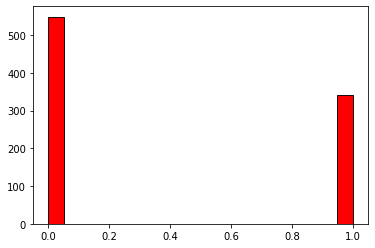

In [ ]:
# cria o histograma
n, bins, patches = plt.hist(df_dataset['Survived'].values, bins=20, color='red', edgecolor='black', linewidth=0.9)

#mostra o gráfico
plt.show()

In [ ]:
df_clean = df_dataset.select_dtypes(include='number')

In [ ]:
df_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_clean.fillna(axis=0, method='ffill')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,19.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
df_clean.drop(labels="PassengerId", axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000
